In [1]:
import pandas as pd
import numpy as np
import csv
from openpyxl import load_workbook
from openpyxl.styles import Font, PatternFill
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud

# Function 3 : Stroage Information

1.Store the dietary information entered by the user as a document 

2.Accumulate continuously new information with each input.

3.Match food to nutritional value. Know better about what you eat.

In [2]:
# Record users diet information and save them as a local file.
def add_daily_meals_to_csv(user_name, date, meals, file_name):
    with open(file_name, mode='a', newline='') as file:
        user_input = csv.writer(file)
        # Write a line of meal for each meal(breakfast,lunch,dinner).
        for meal, food_items in meals.items():
            # When user input multiple food items for one meal, separate them by a semicolon.
            food_items_list = food_items.split(", ")
            for food_items in food_items_list:
                # Multiple food items in same meals will be saved in separet rows with same user information.
                user_input.writerow([user_name, date, meal,food_items])

# User Case 1: inputing a user one day meals.
user_daily_meals = {
    'user_name': 'John Doe',
    'date': '2024/04/08',
    # 'Meals' is a dictionary, key is meals name, value is food items. This function writes a row of data to the CSV file for each meal.
    'meals': {
        'Breakfast': 'American Cheese, Banana Peppers',
        'Lunch': 'Black Forest Ham',
        'Dinner': 'Cheese Lava Burger, chinese_fried_rice',
        'Snack': 'Puddings'     
    }
}

# Define CSV file name.
file_name = 'user_daily_meals.csv'

# Write the file columns.
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['User_Name', 'Date', 'Meal', 'Food_items'])

# Call function to add one day meal.
add_daily_meals_to_csv(
    user_daily_meals['user_name'], 
    user_daily_meals['date'], 
    user_daily_meals['meals'],
    file_name
)

users_file_path = 'user_daily_meals.csv'
user_daily_meals = pd.read_csv(users_file_path)
user_daily_meals.head(10)

User_Name        Date       Meal          Food_items
0  John Doe  2024/04/08  Breakfast     American Cheese
1  John Doe  2024/04/08  Breakfast      Banana Peppers
2  John Doe  2024/04/08      Lunch    Black Forest Ham
3  John Doe  2024/04/08     Dinner  Cheese Lava Burger
4  John Doe  2024/04/08     Dinner  chinese_fried_rice
5  John Doe  2024/04/08      Snack            Puddings

In [3]:
# When user add new meals in another day, it can be added at the bottom of previews meals.
# For example: 
# The second day entry:
user_daily_meals2 = {
    'user_name': 'Peter',
    'date': '2024/04/09',
    'meals': {
        'Breakfast': 'blueberry yogurt',
        'Lunch': 'Grilled Cheese, Pizza Sub',
        'Dinner': 'Mc chicken Burger, Oven Roasted Chicken',
        'Snack': 'cake'
    }
}
add_daily_meals_to_csv(
    user_daily_meals2['user_name'], 
    user_daily_meals2['date'], 
    user_daily_meals2['meals'],
    file_name
)

user_daily_meals2 = pd.read_csv(users_file_path)
user_daily_meals2.head(10)

User_Name        Date       Meal          Food_items
0  John Doe  2024/04/08  Breakfast     American Cheese
1  John Doe  2024/04/08  Breakfast      Banana Peppers
2  John Doe  2024/04/08      Lunch    Black Forest Ham
3  John Doe  2024/04/08     Dinner  Cheese Lava Burger
4  John Doe  2024/04/08     Dinner  chinese_fried_rice
5  John Doe  2024/04/08      Snack            Puddings
6     Peter  2024/04/09  Breakfast    blueberry yogurt
7     Peter  2024/04/09      Lunch      Grilled Cheese
8     Peter  2024/04/09      Lunch           Pizza Sub
9     Peter  2024/04/09     Dinner   Mc chicken Burger

In [4]:
# The third day entry:
user_daily_meals3 = {
    'user_name': 'wilson',
    'date': '2024/04/10',
    'meals': {
        'Breakfast': 'Egg & Cheese, English Breakfast',
        'Lunch': 'Double ShackBurger, Double Vanilla Cup',
        'Dinner': 'Regular Fries,  Tomato juice',
        'Snack': 'Cappuccino'
    }
}
add_daily_meals_to_csv(
    user_daily_meals3['user_name'], 
    user_daily_meals3['date'], 
    user_daily_meals3['meals'],
    file_name
)
user_daily_meals3 = pd.read_csv(users_file_path)
user_daily_meals3.head(15)

User_Name        Date       Meal            Food_items
0   John Doe  2024/04/08  Breakfast       American Cheese
1   John Doe  2024/04/08  Breakfast        Banana Peppers
2   John Doe  2024/04/08      Lunch      Black Forest Ham
3   John Doe  2024/04/08     Dinner    Cheese Lava Burger
4   John Doe  2024/04/08     Dinner    chinese_fried_rice
5   John Doe  2024/04/08      Snack              Puddings
6      Peter  2024/04/09  Breakfast      blueberry yogurt
7      Peter  2024/04/09      Lunch        Grilled Cheese
8      Peter  2024/04/09      Lunch             Pizza Sub
9      Peter  2024/04/09     Dinner     Mc chicken Burger
10     Peter  2024/04/09     Dinner  Oven Roasted Chicken
11     Peter  2024/04/09      Snack                  cake
12    wilson  2024/04/10  Breakfast          Egg & Cheese
13    wilson  2024/04/10  Breakfast     English Breakfast
14    wilson  2024/04/10      Lunch    Double ShackBurger

In [5]:
# Read the food_nutrient_file.
food_nutrient_file_path = 'Food_Nutrient_Values_2.csv'
food_nutrient_file =pd.read_csv(food_nutrient_file_path)

In [6]:
# Define a function to match nutrient for food items in user_daily_meals.
def add_nutrient_columns(user_file_path, food_file_path,user_food_column):
    # Load user case file and food nutrition file.
    user_case_file = pd.read_csv(user_file_path)
    food_nutrition_file = pd.read_csv(food_file_path)
    
    # Unify two file format by removing the space and lower letters.
    user_case_file[user_food_column] = user_case_file[user_food_column].str.strip().str.lower()
    food_nutrition_file['Food_items'] = food_nutrition_file['Food_items'].str.strip().str.lower()
    
    # Merge the user case file with the selected columns from food nutrition file based on the food items.
    merge_user_case_file = user_case_file.merge(food_nutrition_file, left_on = user_food_column, right_on ='Food_items',how='left')
    
    # If users input a food items that not exsit in the food_nutirent_file, it will autimaticly return NaN. 
    # Replace 'NaN' with 0 by fillna() method to proceed deeper calculation.
    for column in ['Calories', 'Total fat (g)', 'Sat Fat (g)',
       'Trans fat (g)', 'Cholesterols (mg)', 'Sodium (mg)', 'Carbohydrate (g)',
       'Sugars (g)', 'Fiber(g)', 'Protein (g)', 'Category']:
        merge_user_case_file[column] = merge_user_case_file[column].fillna(0)
    
    return merge_user_case_file

# Use examples to check the function.
users_add_nurient_file = add_nutrient_columns(users_file_path,food_nutrient_file_path,"Food_items")
users_add_nurient_file.head(5)
#users_add_nurient_file.to_csv(users_add_nurient_file_path, index=False)


User_Name        Date       Meal        Food_items  Calories  Total fat (g)  \
0  John Doe  2024/04/08  Breakfast   american cheese      40.0            4.0   
1  John Doe  2024/04/08  Breakfast   american cheese      70.0            6.0   
2  John Doe  2024/04/08  Breakfast    banana peppers       0.0            0.0   
3  John Doe  2024/04/08      Lunch  black forest ham     450.0           12.0   
4  John Doe  2024/04/08      Lunch  black forest ham     260.0            4.0   

   Sat Fat (g)  Trans fat (g)  Cholesterols (mg)  Sodium (mg)  \
0          2.0            0.0               10.0        210.0   
1          4.0            0.0               15.0        340.0   
2          0.0            0.0                0.0         65.0   
3          5.0            0.0               55.0       1680.0   
4          2.0            0.0               30.0        720.0   

   Carbohydrate (g)  Sugars (g)  Fiber(g)  Protein (g)  Category  
0               1.0         0.0       0.0          2.0  Fastfood  
1               1.0         0.0       0.0          4.0  Fastfood  
2               0.0         0.0       0.0          0.0  Fastfood  
3              57.0         4.0       5.0         29.0      Meat  
4              42.0         5.0       8.0         18.0  Fastfood






Above is the storage function demonstration. 

For in-depth data analysis, I recorded 31 days data in advance for the following data analysis display.


# Function 4 :  Dietary Analysis Report

1.Users can continuously record their meals.

2.Generate Dietary Habit Report. Single day reports contian the meals and food of each meals.
On top of this, the multi-day reports add period_sum data over cycle times.

3.User can download different formats reports.

4.Generate Food Nutrient Report.

## 1. Dietary Habit Report

In [7]:
def single_day_report(user_name, date):
    
    users_file_path = 'Pre-Monthly Data Analysis of Single Person.csv'
    user_case_file = pd.read_csv(users_file_path)
    # Unify the date formate.
    
    single_day_list = []
    
    # Initialize the total nurients of each meal.
    day_total_calories =0
    day_total_totalfat=0
    day_total_satfat=0
    day_total_transfat=0
    day_total_chole=0
    day_total_sodium=0
    day_total_carbo=0
    day_total_sugar=0
    day_total_fiber=0
    day_total_protein=0
    
    # Initialize the target index.
    target_calories = 1800 # In practise, this number get from the User health analysis(Function1)
    target_total_fat = target_calories* 0.35
    target_chole = 300 # Recommended dosage for adults per day.
    target_sodium = 2300 # Recommended dosage for adults per day.
    target_carb = target_calories *0.45
    target_fiber = 25
    target_protein = target_calories*0.2

    for meal in ['Breakfast', 'Lunch', 'Dinner', 'Snack']: 
        meal_total_calories=0
        meal_total_totalfat=0
        meal_total_satfat=0
        meal_total_transfat=0
        meal_total_chole=0
        meal_total_sodium=0
        meal_total_carbo=0
        meal_total_sugar=0
        meal_total_fiber=0
        meal_total_protein=0
        meal_food_items = 0
        
        meal_data = user_case_file[(user_case_file['Meal'] == meal) & 
                            (user_case_file['User_Name'] == user_name) & 
                            (user_case_file['Date'] == date)
                                ]
        single_day_list.append([meal,'','','','','','','','','',''])
        if not meal_data.empty:
            for index, row in meal_data.iterrows():
                # Add food items to the list.
                meal_item = [' -'+row['Food_items'], row['Calories'], row['Total fat (g)'], row['Sat Fat (g)'],
                            row['Trans fat (g)'], row['Cholesterols (mg)'], row['Sodium (mg)'],
                             row['Carbohydrate (g)'], row['Sugars (g)'], row['Fiber(g)'], row['Protein (g)']]
                single_day_list.append(meal_item)
                
                meal_total_calories += row['Calories']
                meal_total_totalfat += row['Total fat (g)']
                meal_total_satfat += row['Sat Fat (g)']
                meal_total_transfat += row['Trans fat (g)']
                meal_total_chole += row['Cholesterols (mg)']
                meal_total_sodium += row['Sodium (mg)']
                meal_total_carbo += row['Carbohydrate (g)']
                meal_total_sugar += row['Sugars (g)']
                meal_total_fiber += row['Fiber(g)']
                meal_total_protein += row['Protein (g)']
                meal_food_items+=1
                
        day_total_calories += meal_total_calories
        day_total_totalfat += meal_total_totalfat
        day_total_satfat += meal_total_satfat
        day_total_transfat += meal_total_transfat
        day_total_chole += meal_total_chole
        day_total_sodium += meal_total_sodium
        day_total_carbo+= meal_total_carbo
        day_total_sugar += meal_total_sugar
        day_total_fiber += meal_total_fiber
        day_total_protein += meal_total_protein
                
        # Add values in blank spot.
        single_day_list[-(meal_food_items + 1)][1:] = [meal_total_calories,meal_total_totalfat,meal_total_satfat,
                                                          meal_total_transfat,meal_total_chole,meal_total_sodium,
                                                        meal_total_carbo,meal_total_sugar,meal_total_fiber,meal_total_protein]
               
                
    single_total_line = ["Total",'','','','','','','','','','']            
    single_day_list.append(single_total_line) 
    single_day_list[-1][1:]=[day_total_calories,day_total_totalfat,day_total_satfat,day_total_transfat,
                             meal_total_chole,meal_total_sodium,meal_total_carbo,meal_total_sugar,
                              meal_total_fiber,meal_total_protein]
 

    completion_rate = ["% Of my target",'','','','','','','','','',''] 
    single_day_list.append(completion_rate)
    
    completion_rate_calories = day_total_calories/target_calories
    completion_rate_total_fat = day_total_totalfat/target_total_fat
    completion_rate_total_chole = day_total_chole/target_chole
    completion_rate_total_sodium = day_total_sodium/target_sodium
    completion_rate_total_carb = day_total_carbo/ target_carb
    completion_rate_total_fiber = day_total_fiber/target_fiber
    completion_rate_total_protein = day_total_protein/target_protein
    
    int_completion_rate_calories = f"{int(completion_rate_calories * 100)}%"
    int_completion_rate_total_fat = f"{int(completion_rate_total_fat * 100)}%"
    int_completion_rate_total_chole = f"{int(completion_rate_total_chole * 100)}%"
    int_completion_rate_total_sodium = f"{int(completion_rate_total_sodium * 100)}%"
    int_completion_rate_total_carb = f"{int(completion_rate_total_carb * 100)}%"
    int_completion_rate_total_fiber = f"{int(completion_rate_total_fiber * 100)}%"
    int_completion_rate_total_protein = f"{int(completion_rate_total_protein * 100)}%"
    
    single_day_list[-1][1:] = [int_completion_rate_calories, int_completion_rate_total_fat, 'No Target',
                    'No Target',int_completion_rate_total_chole, int_completion_rate_total_sodium,
                    int_completion_rate_total_carb, 'No Target', int_completion_rate_total_fiber,
                    int_completion_rate_total_protein]
    

    return single_day_list

#user_name = 'Yan'
#date = '3/2/2024'
#single_day_list = single_day_report(user_name,date)
#single_day_list
#single_day_list = pd.DataFrame(single_day_list)
#single_day_list.to_csv('single_day_list.csv',index=False)


In [8]:
def generate_user_report (user_name, start_date, end_date):
    # Initialize the report.
    summary_report_tamplate = [
        ['User_Name: ' + user_name]
    ]   
     
    # Load user information
    users_file_path = 'Pre-Monthly Data Analysis of Single Person.csv'
    user_case_file = pd.read_csv(users_file_path)
    # Convert date format for matching.
    user_case_file['Date'] = pd.to_datetime(user_case_file['Date'], errors='coerce')
    
    # Convert start_date and end_date to datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    time_window = pd.date_range(start_date, end_date)
    # If user select multiple days, let's print a summary of these days first. Then print each day.
    if len(time_window) >1:
        summary_report_tamplate.extend([
            ['Start Date: ' + start_date.strftime("%Y-%m-%d"), ' ','End Date: ' + end_date.strftime("%Y-%m-%d")],
            ['', 'Calories', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)', 'Cholesterols (mg)',
         'Sodium (mg)', 'Carbohydrate (g)', 'Sugars (g)', 'Fiber(g)', 'Protein (g)']])  
        
        multiple_summary_columns = ['Date', 'Calories', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)', 'Cholesterols (mg)',
               'Sodium (mg)', 'Carbohydrate (g)', 'Sugars (g)', 'Fiber(g)', 'Protein (g)']
        #Create a DataFrame with columns.
        multiple_day_summary =pd.DataFrame(columns = multiple_summary_columns)
        
        for each_day in pd.date_range(start_date,end_date):
            # Each row is a list, representing a day.
            each_day_row = [each_day.strftime('%Y-%m-%d')]
            day_filter = (user_case_file['User_Name']== user_name)&(user_case_file['Date']== each_day)
   
            for nutrient in multiple_summary_columns[1:]:
                    nutrient_total = user_case_file[user_case_file['Date'] == each_day][nutrient].sum()
                    # Add each total nutrient to the list.
                    each_day_row.append(nutrient_total)  

            multiple_day_summary.loc[len(multiple_day_summary)] = each_day_row
        
        totals_line = {'Date': 'Total'}
        for column in multiple_summary_columns[1:]:
            totals_line[column]=multiple_day_summary[column].sum()
        multiple_day_summary.loc[len(multiple_day_summary)] = totals_line
        summary_report_tamplate.extend(multiple_day_summary.values.tolist())
        # Add blank lines between days for clarity
        summary_report_tamplate.append([])  
        summary_report_tamplate.append([])
        
    # Calculate each day's data.
    for single_day in pd.date_range(start_date,end_date):
        summary_report_tamplate.extend([['Date:'+ single_day.strftime("%Y-%m-%d")],
            ['', 'Calories', 'Total fat (g)', 'Sat Fat (g)','Trans fat (g)', 'Cholesterols (mg)', 'Sodium (mg)', 'Carbohydrate (g)',
                   'Sugars (g)', 'Fiber(g)', 'Protein (g)']
        ])
        print_single_day = single_day_report(user_name, single_day.strftime("%-m/%-d/%Y"))
        summary_report_tamplate.extend(print_single_day)
        # Add a blank line between days for clarity
        summary_report_tamplate.append([])
        
    # Save to CSV
    filename = f'{user_name}_Dietary_Report_{start_date.strftime("%Y-%m-%d")}_to_{end_date.strftime("%Y-%m-%d")}.csv'
    summary_report_tamplate= pd.DataFrame(summary_report_tamplate)
    summary_report_tamplate.to_csv(filename, index=False,header = False)
    
    return summary_report_tamplate
            
# Use the function
user_name = 'Yan'
start_date = '2024-03-17'
end_date = '2024-03-19'
user_summary_report = generate_user_report(user_name, start_date, end_date)
user_summary_report.head(50)
        

0         1                     2            3   \
0           User_Name: Yan      None                  None         None   
1   Start Date: 2024-03-17            End Date: 2024-03-19         None   
2                           Calories         Total fat (g)  Sat Fat (g)   
3               2024-03-17      1370                    39           15   
4               2024-03-18      1160                    35            7   
5               2024-03-19      1137                    26            4   
6                    Total      3667                   100           26   
7                     None      None                  None         None   
8                     None      None                  None         None   
9          Date:2024-03-17      None                  None         None   
10                          Calories         Total fat (g)  Sat Fat (g)   
11               Breakfast       290                    12            9   
12           -Low Fat Milk       110                     2            1   
13                  -Latte       180                    10            8   
14                   Lunch       823                    20            3   
15     -chinese_fried_rice       348                     5            1   
16          -fried noodles       475                    15            2   
17                  Dinner       202                     7            3   
18          -pork dumpling       202                     7            3   
19                   Snack        55                     0            0   
20                  -juice        47                     0            0   
21   -Strawberry Green Tea         8                     0            0   
22                   Total      1370                    39           15   
23          % Of my target       76%                    6%    No Target   
24                    None      None                  None         None   
25         Date:2024-03-18      None                  None         None   
26                          Calories         Total fat (g)  Sat Fat (g)   
27               Breakfast       110                     2            1   
28           -Low Fat Milk       110                     2            1   
29                   Lunch       646                    19            1   
30     -chinese_fried_rice       348                     5            1   
31              -Veg Pizza       298                    14            0   
32                  Dinner       357                    14            5   
33   -Chicken Kebab Burger       357                    14            5   
34                   Snack        47                     0            0   
35                  -juice        47                     0            0   
36                   Total      1160                    35            7   
37          % Of my target       64%                    5%    No Target   
38                    None      None                  None         None   
39         Date:2024-03-19      None                  None         None   
40                          Calories         Total fat (g)  Sat Fat (g)   
41               Breakfast        16                     0            0   
42      -English Breakfast        16                     0            0   
43                   Lunch       646                    19            1   
44     -chinese_fried_rice       348                     5            1   
45              -Veg Pizza       298                    14            0   
46                  Dinner       428                     7            3   
47     -chinese_fried_rice       348                     5            1   
48              -Vegetable        80                     2            2   
49                   Snack        47                     0            0   

               4                  5            6                 7   \
0            None               None         None              None   
1            None               None         None       

We offer various formats for users to choose whatever they like.

In [9]:
# Convert csv file to xlsx file.


'''use case:
user_report_template = pd.read_csv('Yan_Dietary_Report_2024-03-09_to_2024-03-11.csv')
user_report_template = pd.read_csv('Yan_Dietary_Report_2024-03-15_to_2024-03-17.csv')
user_report_template = pd.read_csv('Yan_Dietary_Report_2024-03-24_to_2024-03-29.csv')

always check the output file named (Pre_template)Yan_Dietary_Report.xlsx, which will be updated every time you run.

'''

user_report_template = pd.read_csv('Yan_Dietary_Report_2024-03-24_to_2024-03-29.csv')
report_xlsx_path = '(Pre_template)Yan_Dietary_Report.xlsx'
user_report_template.iloc[0, 1:] = pd.NA
user_report_template.to_excel(report_xlsx_path,index=False)

user_report_xlsx = load_workbook(report_xlsx_path)
adjust_format = user_report_xlsx.active

# Set the font and cell color.
excel_font_style = Font(bold=True) 
excel_fill_style = PatternFill(start_color="e7f5e9", end_color="e7f5e9", fill_type="solid")

# For loop to find summary lines that will be applied different colors.
for row in adjust_format.iter_rows(min_row=1, max_row=adjust_format.max_row, min_col=1, max_col=1):
    for cell in row:
        if cell.value in ['Breakfast', 'Lunch', 'Dinner','Snack','Total']:
            full_row = adjust_format[cell.row]
            # Only add colors for cells that have content.
            if cell.value:
                for cell_in_row in full_row:
                    cell_in_row.font = excel_font_style
                    cell_in_row.fill = excel_fill_style
# Save file as xlsx format.
user_report_xlsx.save(report_xlsx_path)
user_data = pd.read_excel(report_xlsx_path)

## 2. Food Nutriention Report 

When users read a food report, here are some question they might want to know:

1.How many food did I eat last month? 

2.How many energy did I eat day?

3.What kind of food do I eat most(category)?

4.what's my favorite food?

5.Any advise for my diet?

Here, let's find the answer.

In [10]:
# Use yan's month diery data to create a food report.
user_month_data = pd.read_csv('Pre-Monthly Data Analysis of Single Person.csv')
user_month_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_Name          233 non-null    object 
 1   Date               233 non-null    object 
 2   Meal               233 non-null    object 
 3   Food_items         233 non-null    object 
 4   Calories           233 non-null    int64  
 5   Total fat (g)      233 non-null    int64  
 6   Sat Fat (g)        233 non-null    int64  
 7   Trans fat (g)      233 non-null    int64  
 8   Cholesterols (mg)  233 non-null    int64  
 9   Sodium (mg)        233 non-null    int64  
 10  Carbohydrate (g)   233 non-null    int64  
 11  Sugars (g)         230 non-null    float64
 12  Fiber(g)           233 non-null    int64  
 13  Protein (g)        233 non-null    int64  
 14  Category           233 non-null    object 
dtypes: float64(1), int64(9), object(5)
memory usage: 27.4+ KB


Q1: How many food did I eat last month? 
    
Q2: How many energy did I eat day?

In [11]:
# Describe the number of food category and food items.
category_count = user_month_data['Category'].unique()
fooditems_count = user_month_data['Food_items'].unique()
food_nutrient_columns = ['Calories', 'Total fat (g)','Sat Fat (g)', 'Trans fat (g)', 
                         'Cholesterols (mg)', 'Sodium (mg)','Carbohydrate (g)', 'Sugars (g)', 
                         'Fiber(g)', 'Protein (g)']
total_nutrient = [user_month_data[column].sum() for column in food_nutrient_columns]

print(f'''Last month, Yan enjoyed {len(category_count)} kinds of food, which include {len(fooditems_count)} food items.
They contain {int(total_nutrient[0])} Calories, {int(total_nutrient[1])} Fat and {int(total_nutrient[-1])} Protein.
Yan intake {int(total_nutrient[0]/31)} calories,{int((total_nutrient[1]/31))} fat, and {int((total_nutrient[-1]/31))} Protein per day.
''')

Last month, Yan enjoyed 9 kinds of food, which include 67 food items.
They contain 52383 Calories, 2009 Fat and 2415 Protein.
Yan intake 1689 calories,64 fat, and 77 Protein per day.



Text(0.5, 1.0, 'Monthly Category Distribution')

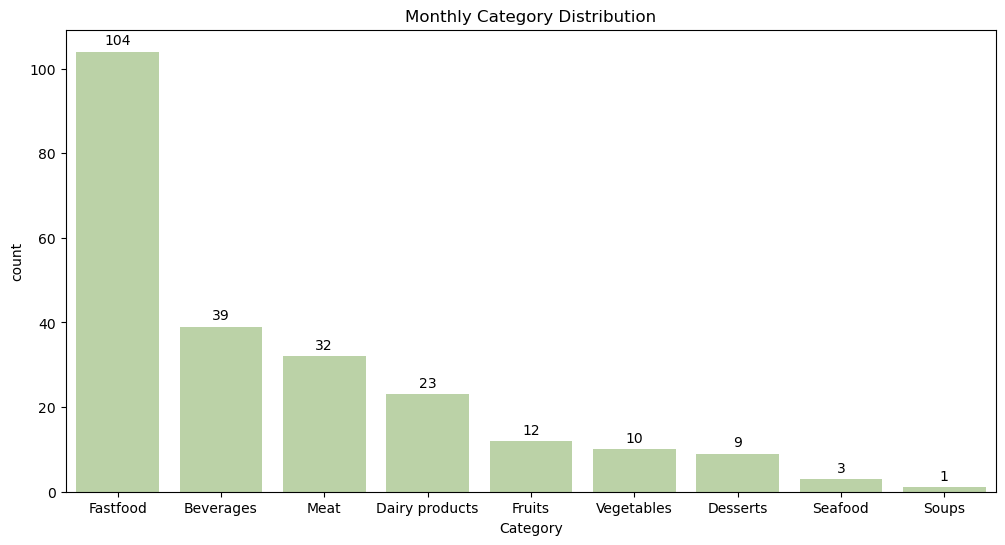

In [12]:
# Visuliazing the category distribution.
plt.figure(figsize=(12, 6))
# Create a count plot using seaborn.
category_count_plot = sns.countplot(x='Category', data=user_month_data, order=user_month_data['Category'].value_counts().index, color= '#bbd9a0')
# Add numeric labels to each bar in the countplot
for p in category_count_plot.patches:  
    # # Get the height of the bar as count.
    category_count_plot.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Monthly Category Distribution')

The daily calories distribution for each category is as follows: 


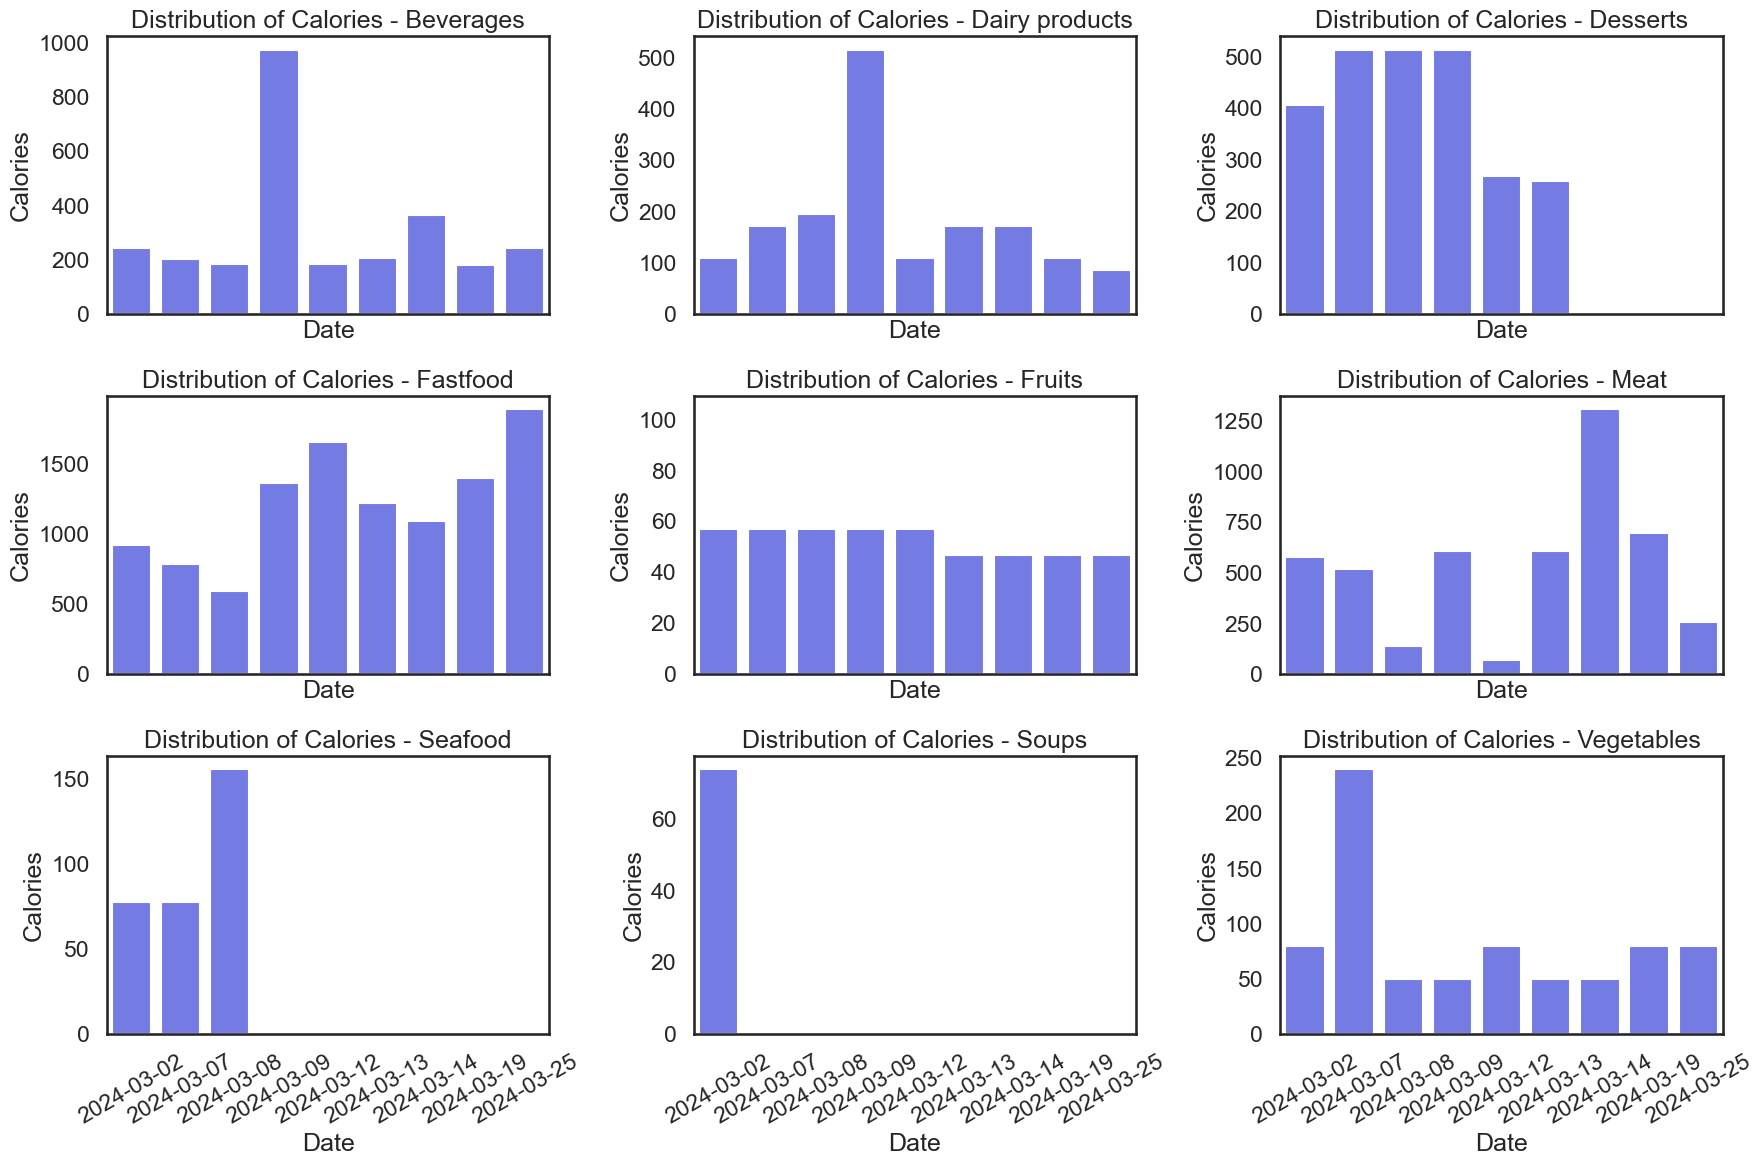

---------------------------------------------------------------------------------------------------
The daily protein distribution for each category is as follows: 


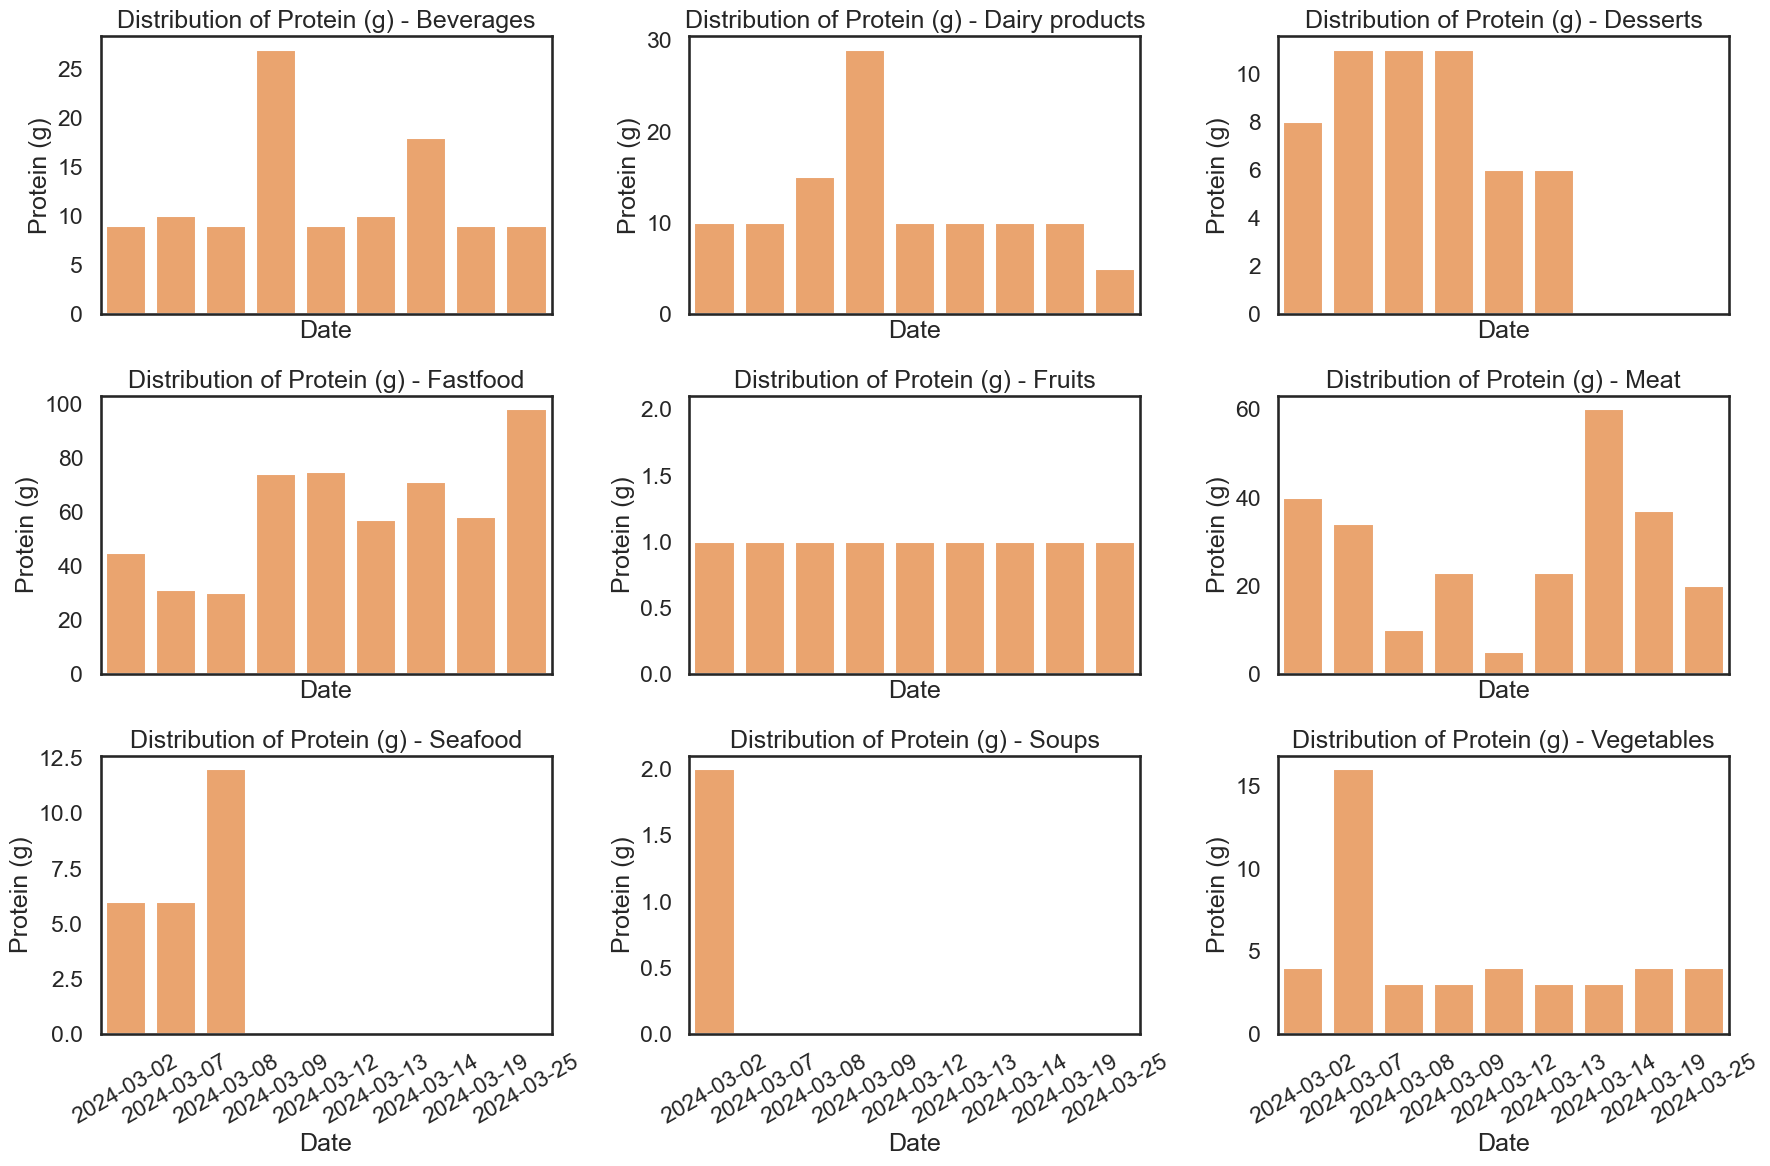

---------------------------------------------------------------------------------------------------
The daily fat distribution for each category is as follows: 


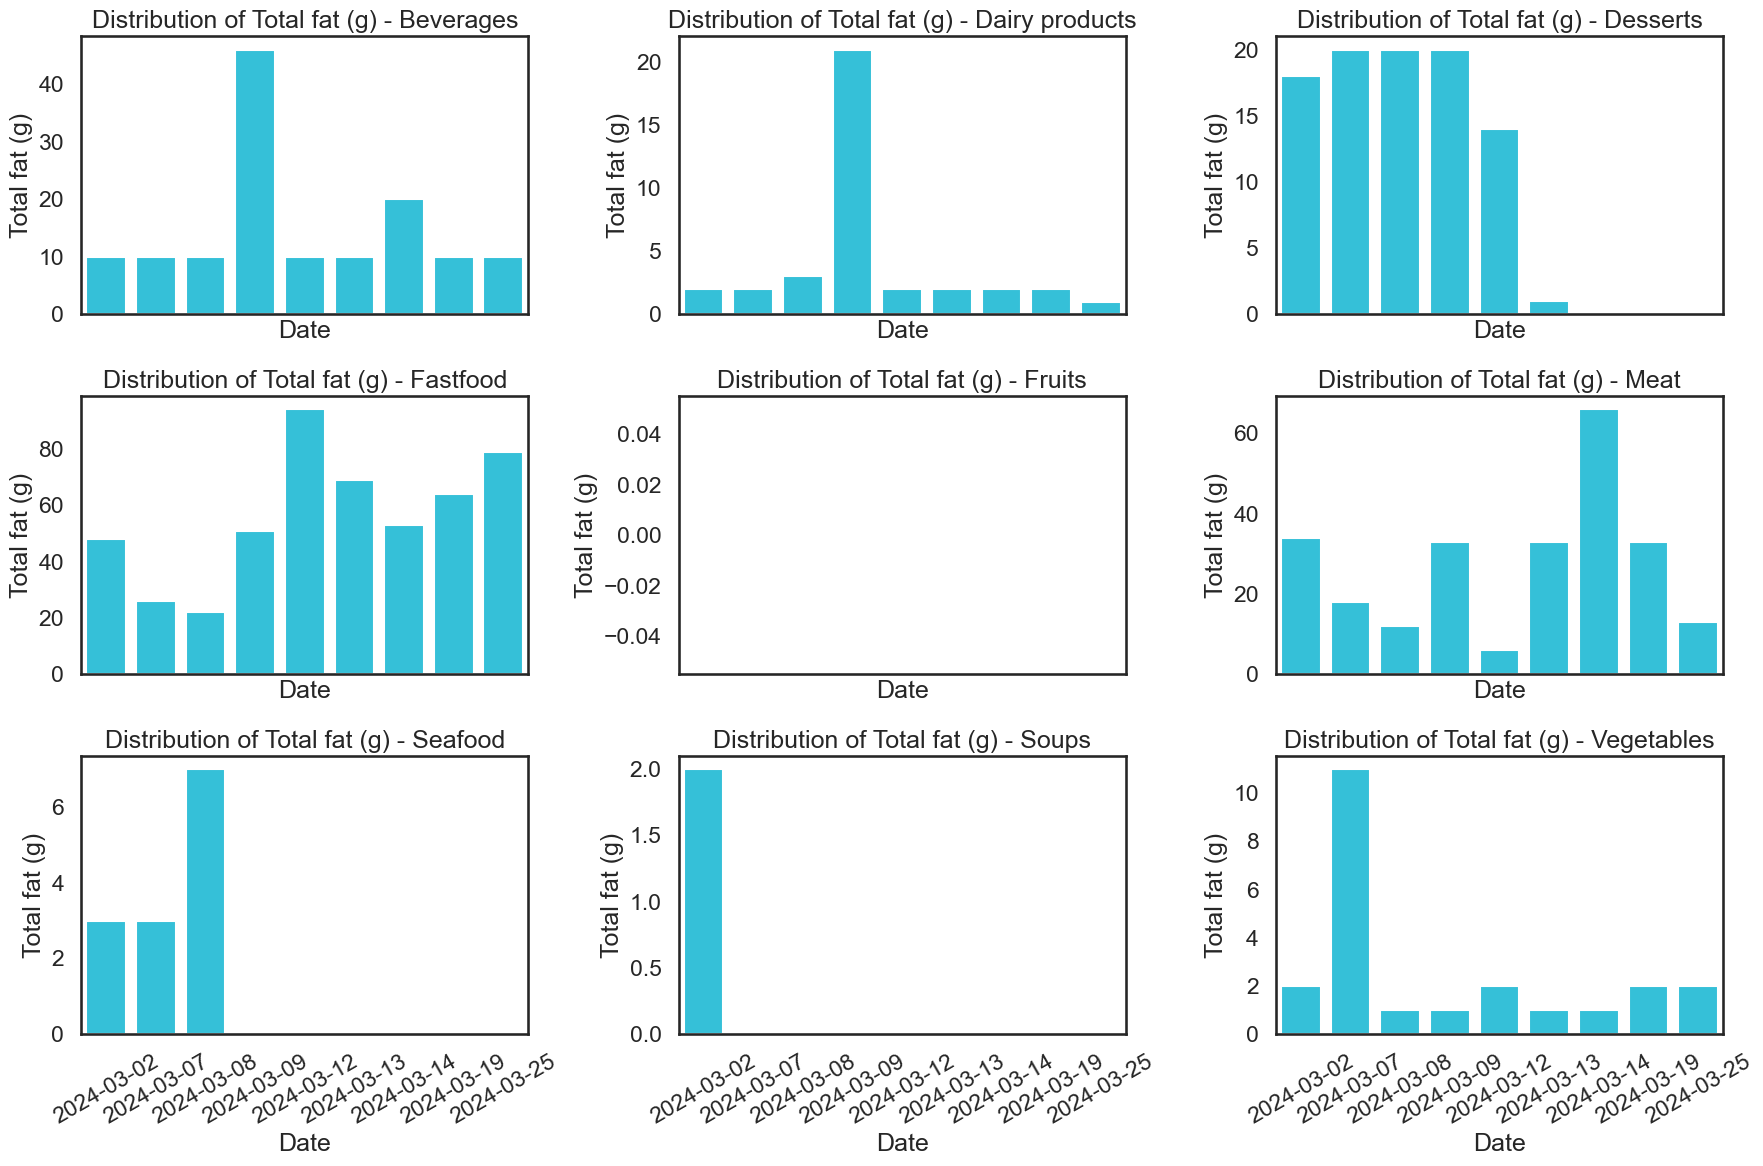

In [13]:
# Visuliazing the distribution of calories of categories.
def calculate_daily_calories_by_category(nutrient_column):
    user_month_data['Date'] = pd.to_datetime(user_month_data['Date'])
    # Group by date and category and count the total calories for each group
    category_daily_nutrient_sum = user_month_data.groupby(['Date', 'Category'])[nutrient_column].sum().reset_index()

    return category_daily_nutrient_sum

category_daily_calories = calculate_daily_calories_by_category('Calories')
category_daily_fat = calculate_daily_calories_by_category('Total fat (g)')
category_daily_protein = calculate_daily_calories_by_category('Protein (g)')
# Convert 'Date' format to standard format and remove the time.
category_daily_protein['Date'] = pd.to_datetime(category_daily_protein['Date']).dt.date
category_daily_calories['Date'] = pd.to_datetime(category_daily_calories['Date']).dt.date
category_daily_fat['Date'] = pd.to_datetime(category_daily_fat['Date']).dt.date

def plot_category_distribution(data, plot_color):
    # Set the theme for the seaborn plots.
    sns.set_theme(style="white", context="talk")
    # There are 10 nutrients so it will be perfect to creat a 3*3 pictures.
    number_cols=3
    # Get the columns name.
    date_column = data.columns[0]
    category_column = data.columns[1]
    value_column = data.columns[2]
    # Get the category content. 
    num_categories = data[category_column].nunique()
    nrows = int(np.ceil(num_categories / number_cols))
    # Set the plot.
    fig, axes = plt.subplots(nrows=nrows, ncols=number_cols, figsize=(number_cols * 6, nrows * 4), sharex=True)
    axes = axes.flatten()
    # Create a bar plot for each category using for loop.
    for ax, (category, category_data) in zip(axes, data.groupby(category_column)):
        sns.barplot(data=category_data, x=date_column, y=value_column, ax=ax, color=plot_color)
        ax.set_title(f'Distribution of {value_column} - {category}')
        ax.set_xlabel(date_column)
        ax.set_ylabel(value_column)
        ax.tick_params(axis='x', rotation=30)
    # Hide any unused subplots.
    for ax in axes[num_categories:]:
        ax.set_visible(False)
        
    # Adjust layout for a clean look and display the plot.
    plt.tight_layout()
    plt.show()

print("The daily calories distribution for each category is as follows: ")
plot_category_distribution(category_daily_calories,'#626bf5')
print("---------------------------------------------------------------------------------------------------")
print("The daily protein distribution for each category is as follows: ")
plot_category_distribution(category_daily_protein,'#ffa15a')
print("---------------------------------------------------------------------------------------------------")
print("The daily fat distribution for each category is as follows: ")
plot_category_distribution(category_daily_fat,'#1ad3f3')

In [14]:
# Aggregate data to ensure uniqueness for each ('Category', 'Food_items') combination。
food_aggregated_data = user_month_data.groupby(['Category', 'Food_items']).agg({
    'Calories': 'sum', 
    # Save values only once.
    'Total fat (g)': 'first', 
    'Sat Fat (g)': 'first',
    'Trans fat (g)': 'first',
    'Cholesterols (mg)': 'first',
    'Sodium (mg)': 'first',
    'Carbohydrate (g)': 'first',
    'Sugars (g)': 'first',
    'Fiber(g)': 'first',
    'Protein (g)': 'first'
}).reset_index()

# Create a sunburst chart
fooditem_in_category = px.sunburst(
    food_aggregated_data,
    path=['Category', 'Food_items'],
    values='Calories', 
    color='Category'   
)
# Update the layout of the sunburst chart
fooditem_in_category.update_layout(
    width=730,
    height=700,
    title='Distribution of Food',
    title_x=0.5 
)

print(f'''As the sunburst showing, fastfood is the most common category of food Yan eats.
The second category is Meat.
The third is Beverage.''')

fooditem_in_category.show()

As the sunburst showing, fastfood is the most common category of food Yan eats.
The second category is Meat.
The third is Beverage.


In [15]:
# Calculate what is her favorite food and how many times they appear.
food_count = Counter(user_month_data['Food_items'])
most_common_food = food_count.most_common(3)

print("Your most favorite foods are:") 
for item, count in most_common_food:
    print(f"{item}, which appears {count} times.")

Your most favorite foods are:
whole-wheat-bread, which appears 16 times.
Bacon, which appears 14 times.
chinese_fried_rice, which appears 13 times.


From the wordcloud, Bacon, whole-wheat-bead and chinese fried rice are Yan's top3 food.


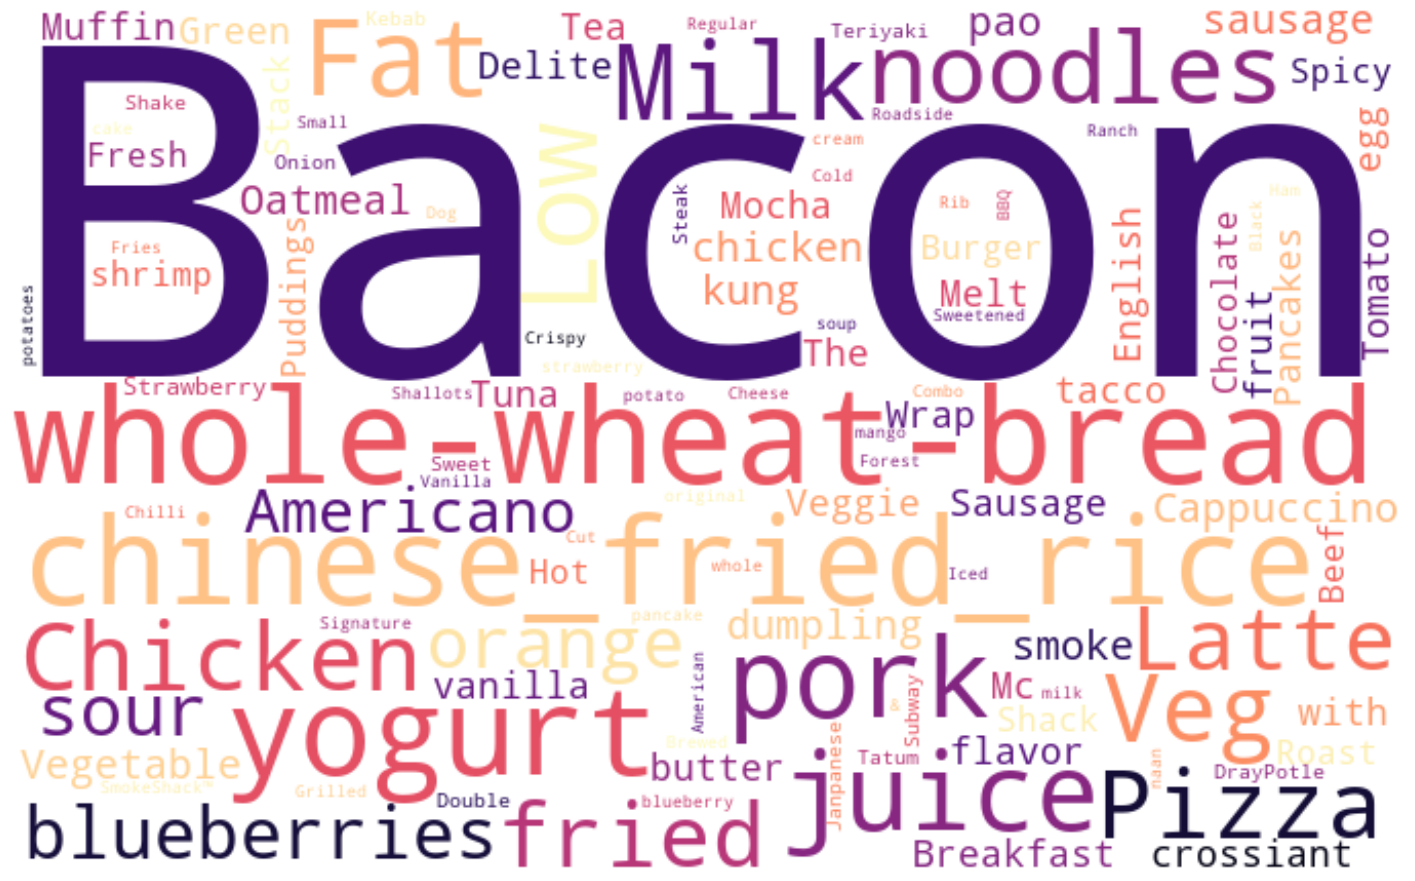

In [16]:
# Create a word cloud, visuliazing which food users often eat.
def food_wordclouding(data):
    all_food_items = " ".join(str(item) for item in data if item != 'nan')  # Join all items into one string, skipping 'nan'
    food_count = Counter(all_food_items.split())  # Split the string into words and count them
    
    # Generate a word cloud with smaller max font size
    fooditems_wordcloud_set = WordCloud(width=680, height=420, colormap='magma', max_font_size=300,background_color='white').generate_from_frequencies(food_count)
    
    plt.figure(figsize=(18,12))
    plt.imshow(fooditems_wordcloud_set, interpolation='bilinear')
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.show()

# Call the function with the 'Food_items' column of your DataFrame

print(f'''From the wordcloud, Bacon, whole-wheat-bead and chinese fried rice are Yan's top3 food.''')
food_wordclouding(user_month_data['Food_items'])


Description：
1. Total Fat and Calories have a correlation coefficient of 0.92, which means there is a positive relationship between these two values. If one increases, the other is likely to increase as well.
2. Protein and Sugars have a correlation coefficient of -0.07. Although this is a negative value, since it is very close to zero, these two values have almost no relationship.
3. From the correlation values, it is not surprising that nutrients like Fat and Protein tend to have a high correlation with Calories, as these nutrients are sources of energy

Since Yan's daily calorie intake is below the target, it is recommended to eat foods that are rich in high-quality fats and proteins.



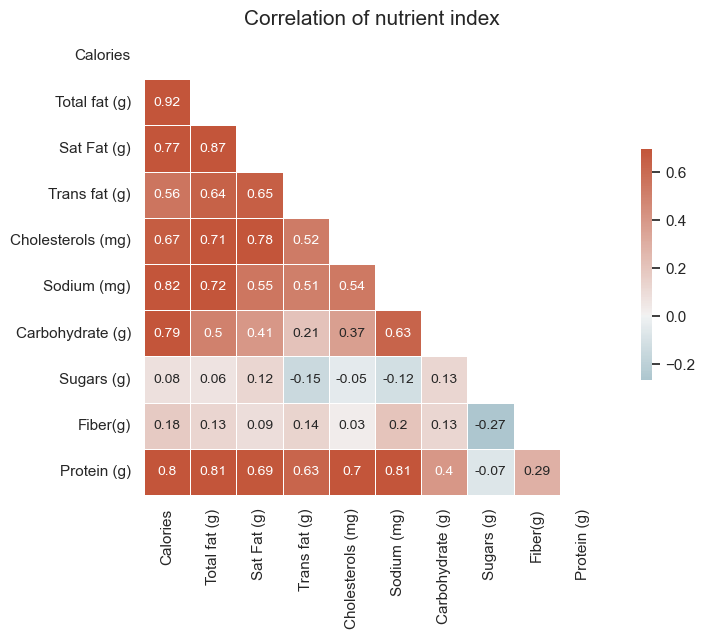

In [17]:
# visualizing the correlation among nutrients by Heatmap.
# Set the theme.
sns.set_theme(style="white")
# Choose the columns that need to be calculated.
food_nutrient_columns =['Calories', 'Total fat (g)','Sat Fat (g)', 'Trans fat (g)', 
                      'Cholesterols (mg)', 'Sodium (mg)','Carbohydrate (g)', 'Sugars (g)', 
                      'Fiber(g)', 'Protein (g)']
#
correlation_analysis = user_month_data[food_nutrient_columns].dropna().copy().corr(method='pearson')
# Diaplay the diagram with a triangle shape, which is easier to understand the correlation.
mask_shape = np.triu(np.ones_like(correlation_analysis, dtype=bool))
# Set size.
f, ax = plt.subplots(figsize=(9, 6))
# Define a diverging color palette for the heatmap, which is easy to distinguish positive and negative correlations.
color_set = sns.diverging_palette(220, 20, as_cmap=True)
# Set the diagram title.
plt.title("Correlation of nutrient index ", fontsize=15)
sns.heatmap(correlation_analysis, mask=mask_shape, cmap=color_set, vmax=.7, 
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=np.round(correlation_analysis, 2), 
            annot_kws={"size": 10});

print(f'''Description：
1. Total Fat and Calories have a correlation coefficient of 0.92, which means there is a positive relationship between these two values. If one increases, the other is likely to increase as well.
2. Protein and Sugars have a correlation coefficient of -0.07. Although this is a negative value, since it is very close to zero, these two values have almost no relationship.
3. From the correlation values, it is not surprising that nutrients like Fat and Protein tend to have a high correlation with Calories, as these nutrients are sources of energy

Since Yan's daily calorie intake is below the target, it is recommended to eat foods that are rich in high-quality fats and proteins.
''')